In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy import linalg as LA

%matplotlib notebook

## Non-Convex Optimization

### Preliminaries

##### Vector and Dot Product Notation

$x^{(i)}=<x_1,x_2,...,x_n>=\begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}$

$x^{(i)}\cdot x^{(i)}=<x_1,x_2,...,x_n>\cdot <x_1,x_2,...,x_n>=\begin{pmatrix}
    x_1 x_2 \dots x_n \\
\end{pmatrix}\cdot \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}=x_1\cdot x_1+x_2\cdot x_2+...+x_n\cdot x_n$.

##### A Handy Identity

$x^Tx=||x||_2^2$.
+ If $x$ is a unit vector, then $x^Tx=||x||_2^2=1^2=1$.

#### Second Degree Taylor Polynomials

+ **2 Dimensions**

    $f(x+\Delta x)\approx f(x)+\Delta x f'(x)+ \frac{1}{2}(\Delta x)^2 f''(x)$
    

+ **n Dimensions**

    $f(x^{(i)}+\vec{\Delta x})\approx f(x^{(i)})+(\vec{\Delta x})^Tg+\frac{1}{2} (\vec{\Delta x})^T H (\vec{\Delta x})$, where $g=g(x^{(i)})$ is the *Gradient* and $H=H(x^{(i)})$ is the *Hessian* at $x^{(i)}$. 

##### Gradient Vector

For $f(x,y)$, the *gradient vector* is the vector at the point $x^{(i)}$ $g=\begin{pmatrix}
    f_x(x^{(i)})\\
    f_y(x^{(i)})\\
\end{pmatrix}$, where $f_x(x^{(i)})$ and $f_y(x^{(i)})$ are the first partial derivatives of $f(x,y)$ at $x^{(i)}$.

##### Hessian Matrix

For $f(x,y)$, the *hessian matrix* at the point $x^{(i)}$ is $H=\begin{pmatrix}
    f_{xx}(x^{(i)}) \hspace{0.1in} f_{xy}(x^{(i)})\\
    f_{yx}(x^{(i)})\hspace{0.1in} f_{yy}(x^{(i)})\\
\end{pmatrix}$, where $f_{xx}(x^{(i)})$, $f_{yx}(x^{(i)})$, $f_{xy}(x^{(i)})$, and $f_{yy}(x^{(i)})$ are the second partial derivatives of $f(x,y)$.

##### Spectral Theorem

If $H\in \mathbb{R}^{n\times n}$ is symmetric, then the $n$ eigenvectors of $H$ can be *chosen* so that $H=Q \Lambda Q^T$ and the $n$ columns of $Q$ are orthonormal eigenvectors of $H$. 
+ **Theorem**:  If $\frac{d^2}{dx_idx_j}f(x^{(i)})$ and $\frac{d^2}{dx_jx_i}f(x^{(i)})$ are continuous at $x^{(i)}$ then, $\frac{d^2}{dx_idx_j}f(x^{(i)})=\frac{d^2}{dx_jx_i}f(x^{(i)})$.
+ By the theorem above, the Hessian Matrix $H=H(x^{(i)})$ is symmetric at most points of the cost function for deep learning problems. 

#### Notation Warning

Whenever the authors write $g$ or $H$ for the gradient and Hessian they mean $g(x^{(i)})$ and $H(x^{(i)})$.

### Non-Convex Optimization Algorithms

#### 1st Order Approximization Algorithms

Gradient Descent: $x^{(i+1)}=x^{(i)}-\epsilon g$.

+ $\epsilon$ is learning rate.  Typical values are $0.1$, $0.01$.
+ $g$ is gradient at $x^{(i)}$.
+ Technically, $x^{(i+1)}=x^{(i)}+\epsilon\cdot (-g)$.

    **Theorem**: If $g^THg>0$ , then the optimal learning rate for $x^{(i+1)}$ is $\epsilon^* \approx \frac{g^Tg}{g^THg}$.

#### 2nd Order Approximization Algorithms

Newton's Method: $x^{(i+1)}=x^{(i)}-H(x^{(i)})^{-1}\cdot g(x^{(i)})$.
+ $H$ is Hessian Matrix at $x^{(0)}$.
+ $H$ is often too computationally expensive to compute.

### The Eigenvalues of the Hessian Determine the Scale of the Learning Rate

Page 85:  "To the extent that the function we minimize can be approximated well by a quadratic function, the eigenvalues of the Hessian thus determine the scale of the learning rate."
+ For any unit vector $u$, $u^THu$ is a directional second derivative.
+ $u^THu=w_1\cdot \lambda_1+...+w_n\cdot \lambda_n$, where $0\leq w_i \leq 1$ is a weight corresponding to the angle between $u$ and $v_i$.  
+ If $||g||=k$ and $g_u$ is the unit vector version of the gradient $g$, then $\epsilon^*=\frac{g^Tg}{g^THg}=\frac{k^2(g_u)^T(g_u)}{k^2(g_u)^TH(g_u)}=\frac{1}{w_1\cdot \lambda_1+...+w_n\cdot \lambda_n}$.

### Comparing Gradient Descent and Newton's Method

Example 1: $f(x,y)=\frac{1}{20}x^2+8y^2$

In [2]:
def f(x, y):
    return (x**2)/20+(y**2)/(0.125)

Gradient: $g=\begin{pmatrix}
    \frac{1}{10}x\\
    16y\\
\end{pmatrix}$.

Hessian: $H=\begin{pmatrix}
    \frac{1}{10} \hspace{0.1in} 0\\
    0 \hspace{0.1in} 16\\
\end{pmatrix}$. 

In [3]:
#Partial Derivative of f(x,y) with respect to x.
def f_x(x):
    return 0.1*x

In [4]:
#Partial Derivative of f(x,y) with respect to y.
def f_y(y):
    return 16*y

In [5]:
#This function computes the next gradient descent step.
#x is point currently at, epsilon is learning rate.
def next_x(x, epsilon): 
    return x-epsilon*np.array([[f_x(x[0][0])],[f_y(x[1][0])]])

In [6]:
#start is starting point, tol is tolerance.
def gradientDescent(start, learningRate, tol):
    x=[]
    steps=0
    x.append(start)
    while LA.norm(x[-1])>tol:
        steps+=1
        temp=next_x(x[-1],learningRate)
        x.append(temp)
        
    return x, steps

Starting point: $x^{(0)}=(10^3, 10^2)$.

Learning Rate: $\epsilon = 0.1$. 

In [13]:
X=gradientDescent(np.array([[10**3],[10**2]]), 0.1, 0.9)

In [8]:
X[0][0:10]

[array([[1000],
        [ 100]]),
 array([[990.],
        [-60.]]),
 array([[980.1],
        [ 36. ]]),
 array([[970.299],
        [-21.6  ]]),
 array([[960.59601],
        [ 12.96   ]]),
 array([[950.9900499],
        [ -7.776    ]]),
 array([[941.4801494],
        [  4.6656   ]]),
 array([[932.06534791],
        [ -2.79936   ]]),
 array([[922.74469443],
        [  1.679616  ]]),
 array([[913.51724748],
        [ -1.0077696 ]])]

<IPython.core.display.Javascript object>


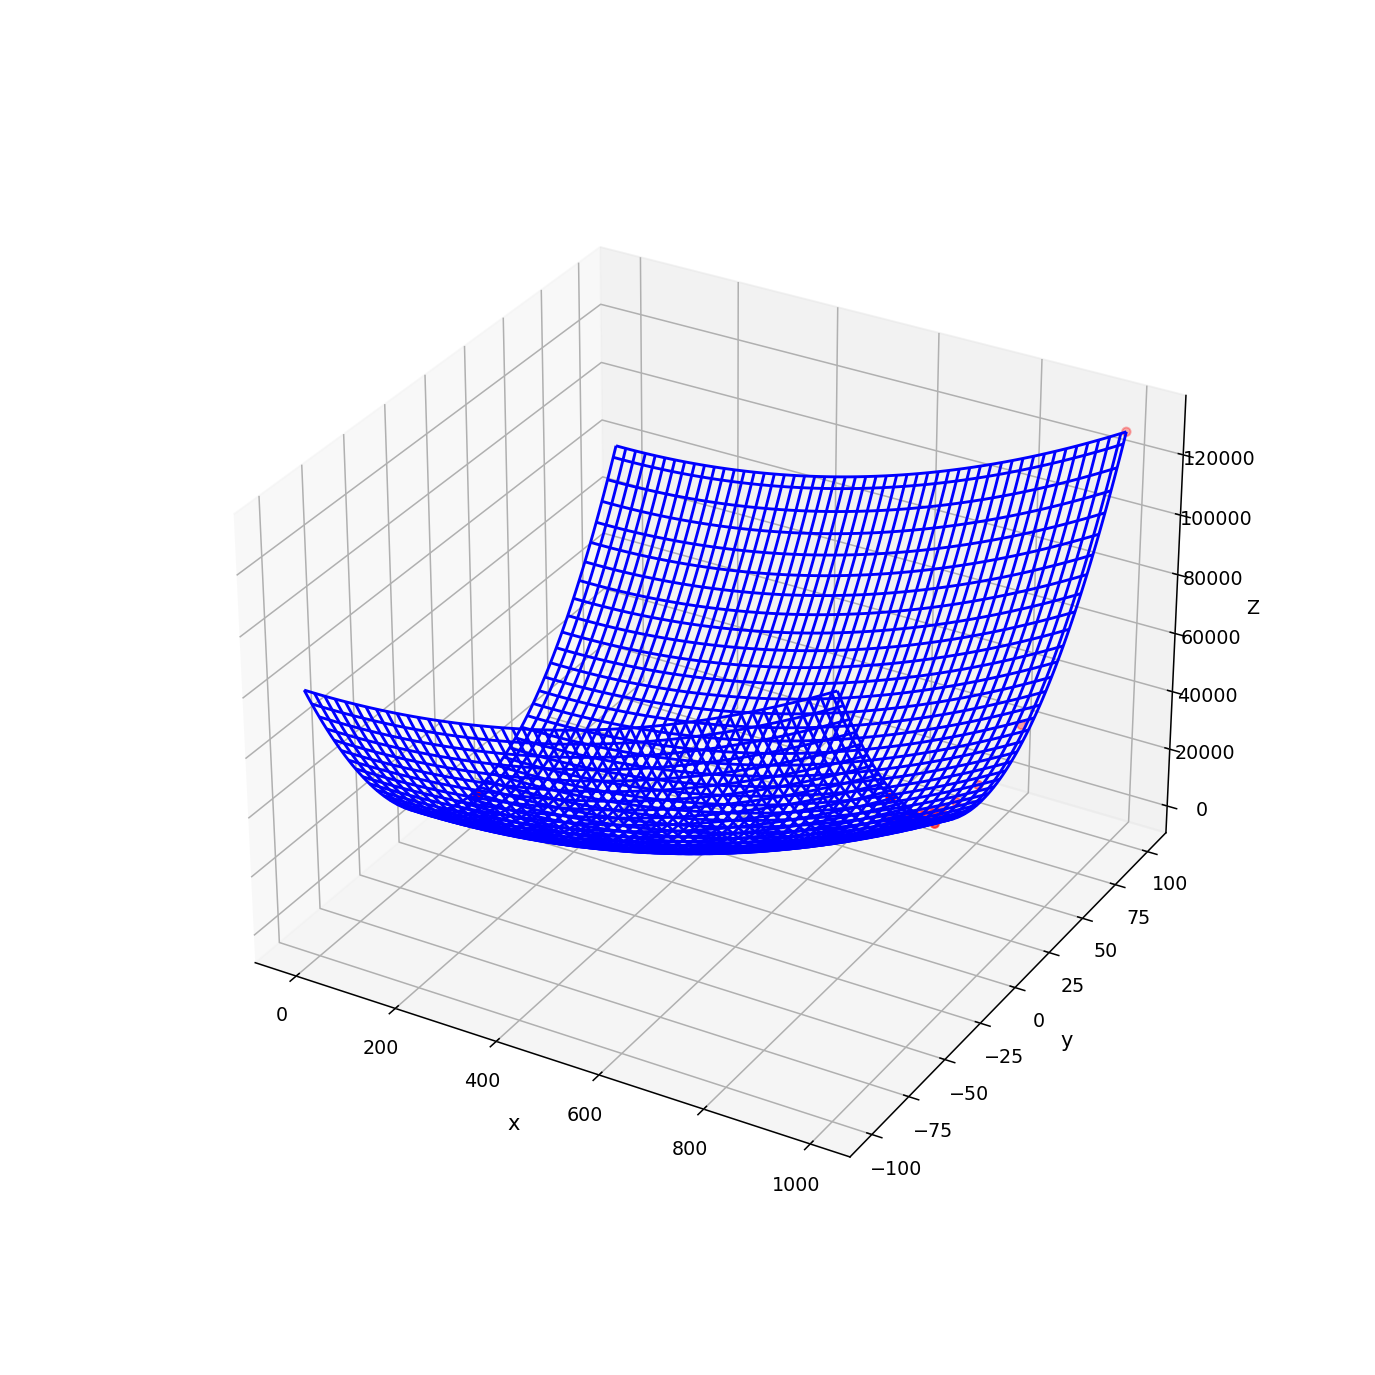

Text(0.5, 0, 'Z')

In [9]:
x_val=[X[0][i][0][0] for i in np.arange(len(X[0]))]
y_val=[X[0][i][1][0] for i in np.arange(len(X[0]))]
z_val=[f(x_val[i],y_val[i]) for i in np.arange(len(X[0]))]
m=20
x = np.linspace(-10, 1000, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis_r', edgecolor='none')
ax.plot_wireframe(X,Y,Z,color="blue")
#ax.plot3D(np.array([1000,994]), np.array([100,2]), np.array([130000,49433.8]), linewidth=3, color='Red')
ax.scatter3D(np.array([0]), np.array([0]), np.array([0]), color='Red')
ax.scatter3D(np.array(x_val[0:m]), np.array(y_val[0:m]), np.array(z_val[0:m]), color='Red')
#ax.set_title("z=(x^2)/20+8y^2", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

##### Number of Steps to get within $0.9$ of minimum.

In [14]:
X[1]

698

Starting point: $x^{(0)}=(10^3, 10^2)$.

Learning Rate: $\epsilon = 0.01$.

In [11]:
Y=gradientDescent(np.array([[10**3],[10**2]]), 0.01, 0.9)

##### Number of Steps to get within $0.9$ of minimum.

In [12]:
Y[1]

7010

### Newton's Method

$x^{(1)}=x^{(0)}-H(x^{(0)})^{-1}\cdot g(x^{(0)})=\begin{pmatrix}
    10^3\\
    10^2\\
\end{pmatrix}-\begin{pmatrix}
    10 \hspace{0.1in} 0\\
    0 \hspace{0.1in} 1/16\\
\end{pmatrix}\cdot \begin{pmatrix}
    10^2\\
    16\cdot 10^2\\
\end{pmatrix}=\begin{pmatrix}
    0\\
    0\\
\end{pmatrix}$.

## Why Does Gradient Descent Perform So Poorly?

Page 87:  "In one direction the derivative increases rapidly while in the another direction it increases slowly.  Gradient descent is unaware of this change in the derivative, so it does not know that it needs to explore preferentially in the direction where the derivative remains negative for longer."  

### Condition Number

The **condition number** $\kappa$ of a square matrix $A\in \mathbb{R}^{n\times n}$ is 
    $\kappa(A)=\frac{\lambda_{\text{max}}}{\lambda_{\text{min}}}$, provided $A$ has a full set of eigenvalues. 
+ $0\leq \kappa \leq \infty$.  
+ $\kappa$ close to $1$ is good, otherwise $A$ is said to be *ill-conditioned*.
+ For a Hessian matrix $H$, $\kappa(H)$ quantifies how well the gradient will perform.
+ From Example 1, $H=\begin{pmatrix}
    \frac{1}{10} \hspace{0.1in} 0\\
    0 \hspace{0.1in} 16\\
\end{pmatrix}$ has condition number  $\kappa(H)=\frac{16}{1/10}=160$.

## How do we modify $f(x,y)=\frac{1}{20}x^2+8y^2$ so that the condition number is closer to $1$?

### Useful Properties

+ The eigenvalues of $\begin{pmatrix}
    a\hspace{0.1in} 0      \\
    0\hspace{0.1in} b\\
\end{pmatrix}$ are $\lambda_1=a$ and $\lambda_2=b$. 

+ For $a,b>0$, $z=\frac{a}{2}x^2+\frac{b}{2}y^2$, $a$ controls stretch and shrink in $x$ direction and $b$ controls stretch and shrink in $y$ direction.

Example 2: $g(x,y)=\frac{x^2}{2}+\frac{y^2}{2}$.

Starting point: $x^{(0)}=(10^3, 10^2)$.

Gradient $g=\begin{pmatrix}
    x\\
    y\\
\end{pmatrix}\Rightarrow g(x^{(0)})=\begin{pmatrix}
    10^3\\
    10^2\\
\end{pmatrix}=x^{(0)}$.

Hessian: $H=\begin{pmatrix}
    1 \hspace{0.1in} 0\\
    0 \hspace{0.1in} 1\\
\end{pmatrix}$.

Optimal Learning Rate:  $\frac{g^Tg}{g^THg} = 1$.

Gradient Descent: $x^{(1)}=x^{(0)}-\epsilon g=\begin{pmatrix}
    10^3\\
    10^2\\
\end{pmatrix}-1\cdot \begin{pmatrix}
    10^3\\
    10^2\\
\end{pmatrix}=\begin{pmatrix}
    0\\
    0\\
\end{pmatrix}$.

Newton's Method: $x^{(1)}=x^{(0)}-H(x^{(0)})^{-1}\cdot g(x^{(0)})=x^{(0)}-I^{-1}\cdot g(x^{(0)})=x^{(0)}-x^{(0)}=\begin{pmatrix}
    0\\
    0\\
\end{pmatrix}$.

### The Simple Example at End of Chapter 4

Key Facts:
+ Norms are functions from $\mathbb{R}^n$ to $\mathbb{R}$.  In symbols, $||\cdot ||:\mathbb{R}^n\rightarrow \mathbb{R}$.
+ A Linear Transformation is a function whose domain and codomain (target) are vector spaces.
+ Matrices are linear transformations.

    $A\in \mathbb{R}^{m\times n}$ is linear transformaion with domain $\mathbb{R}^n$ and codomain $\mathbb{R}^m$.  In symbols, $A:\mathbb{R}^n \rightarrow \mathbb{R}^m$.

The system of linear equations 

$a_{11}x_1+...a_{1n}x_n=b_1$

$a_{21}x_1+...a_{2n}x_n=b_2$

$\vdots$              

$a_{n1}x_1+...a_{nn}x_n=b_n$

can be written as $Ax=b$, where 

$A=\begin{pmatrix}
    a_{11} \hspace{0.1in} \dots \hspace{0.1in} a_{1n}\\
    a_{21} \hspace{0.1in} \dots \hspace{0.1in} a_{2n}\\
    \vdots \hspace{0.1in}  \hspace{0.1in} \vdots \\
    a_{n1} \hspace{0.1in} \dots \hspace{0.1in} a_{nn}\\
\end{pmatrix}$, $x=\begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{pmatrix}$, and $b=\begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_n \\
\end{pmatrix}$.

**Ax-b is a linear transformation from $\mathbb{R}^n$ to $\mathbb{R}^n$**.

$f(x)=\frac{1}{2}||Ax-b||_2^2=\frac{1}{2}||\cdot||_2^2 \circ (Ax-b)$ is a function from $\mathbb{R}^n$ to $\mathbb{R}$.

Set $X_i=a_{i1}x_1+...a_{in}x_n-b_i$, the $i$th component of $Ax-b$ so that $X=\begin{pmatrix}
    X_1 \\
    X_2 \\
    \vdots \\
    X_n \\
\end{pmatrix}$.

So, $f(x)=\frac{1}{2}||Ax-b||_2^2=\frac{1}{2}||X||_2^2=\frac{1}{2}(X_1^2+...+X_n^2)$.

**Computing the Gradient**

$\frac{df}{dX_i}=X_i$.

$g=\begin{pmatrix}
    X_1 \\
    X_2 \\
    \vdots \\
    X_n \\
\end{pmatrix}$.

#### Least Squares Problem

Problem: $Ax=b$ often does not have a solution.
+ This happens when $b\notin$ range$(A)$=columnSpace$(A)$.

Goal: Find the $x$ that minimizes $||Ax-b||_2^2$.  
+ The $x$ that does this is called the least squares solution.
+ $\hat{x}=$ least squares solution.
+ $\hat{x}=A^+b$.